# Looking into different simple linear regression methods

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
from jmspack.NLTSA import flatten

In [3]:
import casadi as ca

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
from scipy.stats import linregress
from statsmodels.regression.linear_model import OLS

In [6]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [7]:
tmp = os.getcwd()
os.chdir(tmp.split("/playground")[0])

# from romeo.romeo import ROMEO
# from romeo.utils import formula_parser

os.chdir(tmp)

# Make X and y data

In [8]:
amount_of_features = 4
X, y, coef = make_regression(n_samples=100,
    n_features=amount_of_features,
    n_informative=amount_of_features,
                             noise=5,
                             coef=True, 
                            random_state=42)

In [9]:
coef

array([86.47223763,  5.63754967, 27.34070719, 41.48195023])

# Scipy

In [10]:
if amount_of_features == 1:
    res=linregress(x=X.reshape(1,-1), y=y)
    res

    _ = plt.plot(X, y, 'o', label='original data')
    _ = plt.plot(X, res.intercept + res.slope*X, 'r', label='fitted line')
    _ = plt.legend()

# Sklearn

In [11]:
reg = LinearRegression().fit(X, y)

In [12]:
reg.coef_, reg.intercept_, reg.score(X, y)

(array([86.70482673,  5.68738212, 27.05974096, 40.58492471]),
 -0.03917208670976713,
 0.9970869093696945)

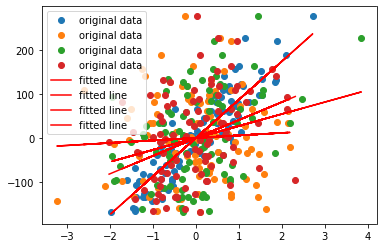

In [13]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, reg.intercept_ + reg.coef_*X, 'r', label='fitted line')
_ = plt.legend()

# Statsmodels

In [30]:
res = OLS(endog=y, exog=statsmodels.tools.tools.add_constant(data=X, prepend=True, has_constant='skip')).fit()

In [31]:
res.params

array([-0.03917209, 86.70482673,  5.68738212, 27.05974096, 40.58492471])

In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     8129.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):          1.74e-119
Time:                        17:38:45   Log-Likelihood:                -308.10
No. Observations:                 100   AIC:                             626.2
Df Residuals:                      95   BIC:                             639.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0392      0.542     -0.072      0.943      -1.115       1.036
x1            86.7048      0.559    155.128      0.000      85.595      87.814
x2             5.6874      0.521     10.912      0.000       4.653       6.722
x3            27.0597      0.576     46.945      0.000      25.915      28.204
x4            40.5849      0.626     64.800      0.000      39.342      41.828
==============================================================================
Omnibus:                        0.847   Durbin-Watson:                   2.391
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.947
Skew:                           0.200   Prob(JB):                        0.623
Kurtosis:                       2.740   Cond. No.                         1.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

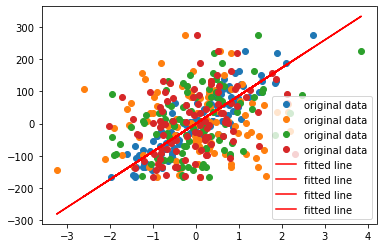

In [32]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, res.params[0] + res.params[1]*X, 'r', label='fitted line')
_ = plt.legend()

# Manual version using numpy

In [17]:
if amount_of_features == 1:
    x = X.reshape(1,-1)

    n = len(x)
    xmean = np.mean(x, None)
    ymean = np.mean(y, None)

    # Average sums of square differences from the mean
    #   ssxm = mean( (x-mean(x))^2 )
    #   ssxym = mean( (x-mean(x)) * (y-mean(y)) )
    ssxm, ssxym, _, ssym = np.cov(x, y, bias=1).flat

    slope = ssxym / ssxm
    intercept = ymean - slope*xmean

    # slope, intercept

    # np.vstack([x, np.ones(len(x))]).T

    # intercept, slope = np.linalg.lstsq(statsmodels.tools.tools.add_constant(data=X, prepend=True, has_constant='skip'), y, rcond=None)[0]
    # slope, intercept

    _ = plt.plot(X, y, 'o', label='original data')
    _ = plt.plot(X, intercept + slope*X, 'r', label='fitted line')
    _ = plt.legend()

In [18]:
# np.dot(x, y)
# np.matmul(X,y)

In [19]:
# X / y.reshape(-1,1)

## Learning matrix multiplication to achieve linear regression output

https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf

Add ones in case you wish to have the intercept returned

In [20]:
X[0:5].T

array([[ 0.85243333, -0.49300093, -1.1429703 ,  0.37569802, -1.19620662],
       [-0.66178646, -0.20812225,  0.05820872, -1.15099358, -1.10633497],
       [ 0.18645431, -0.62269952,  0.15372511,  0.11092259, -0.18565898],
       [-2.02514259,  0.28099187, -0.88385744, -0.54438272, -0.47917424]])

In [21]:
np.ones(len(X[0:5]))

array([1., 1., 1., 1., 1.])

In [22]:
x = np.vstack([np.ones(len(X)), X.T#.reshape(1,-1)
              ]
             ).T
x[0:5]

array([[ 1.        ,  0.85243333, -0.66178646,  0.18645431, -2.02514259],
       [ 1.        , -0.49300093, -0.20812225, -0.62269952,  0.28099187],
       [ 1.        , -1.1429703 ,  0.05820872,  0.15372511, -0.88385744],
       [ 1.        ,  0.37569802, -1.15099358,  0.11092259, -0.54438272],
       [ 1.        , -1.19620662, -1.10633497, -0.18565898, -0.47917424]])

Step 1: X`X

In [23]:
np.matmul(x.transpose(1,0), x)

array([[100.        ,   4.37641733,   2.24956986,   3.37458003,
         -0.98112288],
       [  4.37641733,  95.70624341,  -3.76647012,  12.82009733,
         -1.73070154],
       [  2.24956986,  -3.76647012, 107.95712708,  -3.23772973,
          1.56998234],
       [  3.37458003,  12.82009733,  -3.23772973,  89.88206826,
         -1.37435278],
       [ -0.98112288,  -1.73070154,   1.56998234,  -1.37435278,
         74.60970248]])

Step 2: (X`X)^-1

In [24]:
np.linalg.inv(np.matmul(x.transpose(1,0), x))

array([[ 0.01003589, -0.0004227 , -0.00023532, -0.00032313,  0.00012117],
       [-0.0004227 ,  0.01068484,  0.00033379, -0.00149293,  0.00020777],
       [-0.00023532,  0.00033379,  0.00929097,  0.00029307, -0.00018546],
       [-0.00032313, -0.00149293,  0.00029307,  0.01136383,  0.00016428],
       [ 0.00012117,  0.00020777, -0.00018546,  0.00016428,  0.01341642]])

Step 3: X`Y

In [25]:
np.matmul(x.transpose(1,0), y)

array([ 439.82992453, 8553.26858454,  263.4396618 , 3469.42540198,
       2849.74687256])

Step 4 (put it all together): (X'X)^-1 X'Y

In [26]:
X_trans_X_inv = np.linalg.inv(np.matmul(x.transpose(1,0), x))
X_trans_y = np.matmul(x.transpose(1,0), y)

results = np.dot(X_trans_X_inv, X_trans_y)

np.set_printoptions(suppress=True)
results

array([-0.03917209, 86.70482673,  5.68738212, 27.05974096, 40.58492471])

In [27]:
coef

array([86.47223763,  5.63754967, 27.34070719, 41.48195023])

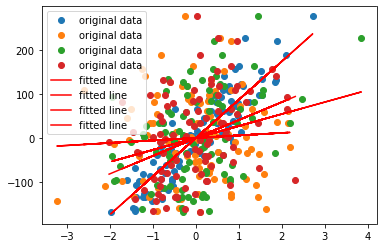

In [28]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, results[0] + results[1:len(results)]*X, 'r', label='fitted line')
_ = plt.legend()

# Casadi

In [29]:
theta

NameError: name 'theta' is not defined

In [ ]:
ntheta = x.shape[1]
theta = ca.SX.sym("theta", ntheta)

alpha=1
# fit_intercept = True

model_method = "lasso"

# create residual
e = y - ca.mtimes(x, theta)


if model_method == "ols":
    # create optimization problem (x: optimization parameter, f: cost function)
    nlp = {"x": theta, "f": 0.5 * ca.dot(e, e)}

elif model_method == "lasso":
    # CASE with regularization in cost function (LASSO)
    nlp = {"x": theta, "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.sum1(ca.fabs(theta))}

else:
    # CASE with regularization in cost function (RIDGE)
    nlp = {"x": theta, "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.dot(theta, theta)}

# solve opt
solver = ca.nlpsol("ols", "ipopt", nlp)
sol = solver(x0=np.zeros(ntheta))

theta_est = sol["x"]

print(f"theta true: {coef}")
print(f"theta est: {theta_est}")

In [ ]:
results = flatten(theta_est.toarray().tolist())
results

In [ ]:
_ = plt.plot(X, y, 'o', label='original data')
_ = plt.plot(X, results[0] + results[1:len(results)]*X, 'r', label='fitted line')
_ = plt.title(f"{model_method} regression")
_ = plt.legend()

In [ ]:
stop!

## Learning matrix multiplication to achieve linear mixed models output

https://stats.idre.ucla.edu/other/mult-pkg/introduction-to-linear-mixed-models/

https://en.wikipedia.org/wiki/Mixed_model

https://m-clark.github.io/docs/mixedModels/mixedModels.html#mixed_model_3c:_general_notation

Add ones in case you wish to have the intercept returned

# Statsmodels regularized mixedLM examples

In [ ]:
data = sm.datasets.get_rdataset('dietox', 'geepack').data

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit(method=["lbfgs"])
# mdf.summary()

In [ ]:
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"], re_formula="~Time")
mdf = md.fit(method=["lbfgs"])
mdf.summary()

In [ ]:
# mdf = md.fit_regularized(method="l1", alpha=1, ptol=1e-06)
# # mdf.summary

# mdf.fe_params

In [ ]:
import re

In [ ]:
formula_string = "Weight ~ Time + (1 + Time | Pig)"

In [ ]:
target = formula_string.replace(" ", "").split("~")[0]
fixed_effect = formula_string.replace(" ", "").split("~")[1].split("+")[0]
random_effects = re.findall("\((.*?)\)", formula_string)

In [ ]:
clusters = random_effects[0].replace(" ", "").split("+")[1].split("|")[1]

In [ ]:
{"target": target,
"fixed_effect": fixed_effect,
"random_effects": random_effects,
"clusters": clusters}

In [ ]:
formula_parser(formula_string)

# LMM equation

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [ ]:
y = data[target]
y.head(2)

In [ ]:
x = data[[fixed_effect, "Litter"]]
x.head(2)

In [ ]:
model = Lasso(max_iter=1000, warm_start=False, fit_intercept=True, tol=1e-05)

In [ ]:
_ = model.fit(X=x, y=y)

In [ ]:
beta = model.coef_
beta

In [ ]:
u = data[clusters].unique()

In [ ]:
u

In [ ]:
len(u)

In [ ]:
data[clusters]

In [ ]:
data[clusters].value_counts().sort_index()

In [ ]:
# zeros_array = np.zeros((data.shape[0], len(u)))

In [ ]:
# np.put(zeros_array[0], range(0,12), 4601)

In [ ]:
# zeros_array#[0, 0:13]

In [ ]:
# z = np.diag(data[clusters])
# z.shape

In [ ]:
z_list = list()
for cluster_group in u:
    tmp = data.loc[data[clusters]==cluster_group, clusters]
#     print(cluster_group)

#     np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1))
    
    z_list.append(np.pad(tmp, (tmp.index.tolist()[0], data[clusters].shape[0] - tmp.index.tolist()[-1]+1)))

In [ ]:
z_list[1].shape

In [ ]:
possible_Z_df = pd.DataFrame(np.vstack(z_list).T)#.head(50)

In [ ]:
binary_df = np.where(possible_Z_df > 0 , 1, possible_Z_df)

In [ ]:
_ = plt.figure(figsize=(10, 10))
_ = sns.heatmap(binary_df)

In [ ]:
# Z = possible_Z_df.loc[0: 860].values
Z = binary_df[0: 861]

In [ ]:
Z

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e00ba9a8e13237ca374d55bb3070aebd12a5b8e4" />

In [ ]:
np.matmul(x.values, beta).shape

In [ ]:
np.matmul(Z, u).shape

In [ ]:
pred_y = np.add(np.matmul(x.values, beta), np.matmul(Z, u))

In [ ]:
model.intercept_

In [ ]:
_ = plt.figure(figsize=(30, 5))
_ = plt.scatter(pred_y, y)
_ = plt.plot(pred_y, model.intercept_ + beta*x, 'r', label='fitted line')
_ = plt.legend()

In [ ]:
x.shape

In [ ]:
Z.shape

In [ ]:
model.shape

In [ ]:
y.values.reshape(-1, 1).shape

In [ ]:
# ntheta = x.shape[1]
ntheta_fixed = 2 #(time, litter)
ntheta_random = 72 #(amount of pigs groups)
theta_fixed = ca.SX.sym("theta_fixed", ntheta_fixed)
theta_random = ca.SX.sym("theta_random", ntheta_random)

alpha=1

model_method = "ridge"

# make model
model = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z, theta_random)

In [ ]:
model_fixed = ca.mtimes(x.values, theta_fixed) + ca.mtimes(Z, theta_random)

In [ ]:
# create residual
e = y.values.reshape(-1, 1) - model

In [ ]:
# ca.vertcat([ntheta_fixed, ntheta_random])
# ca.vertcat(theta_fixed, theta_random)

In [ ]:
# # create residual
# e = y - ca.mtimes(x, theta)


if model_method == "ols":
    # create optimization problem (x: optimization parameter, f: cost function)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5 * ca.dot(e, e), }

elif model_method == "lasso":
    # CASE with regularization in cost function (LASSO)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.sum1(ca.fabs(theta_fixed))}

else:
    # CASE with regularization in cost function (RIDGE)
    nlp = {"x": ca.vertcat(theta_fixed, theta_random), "f": 0.5*ca.dot(e, e) + 0.5*alpha*ca.dot(theta_fixed, theta_fixed)}

# solve opt
solver = ca.nlpsol("ols", "ipopt", nlp)
sol = solver(x0=np.zeros(ntheta_fixed + ntheta_random))

theta_est = sol["x"]

print(f"theta true: {coef}")
print(f"theta est: {theta_est}")

In [ ]:
results = flatten(theta_est.toarray().tolist())
# results

In [ ]:
_ = plt.figure(figsize=(30, 5))
_ = plt.scatter(pred_y, y)
_ = plt.plot(pred_y, model.intercept_ + beta*x, 'r', label='fitted line')
_ = plt.legend()

In [ ]:
# ca.mtimes(x.values, theta_fixed)

In [ ]:
# ode = ca.Function('model', [x, theta_fixed], [ca.mtimes(x.values, theta_fixed)])
# ode = ca.Function('model', [x, z, theta_fixed, theta_random], [model])

In [ ]:
# f = cost function
# g = cost function relative to constraint
# lams = lagrangians
# x = beta weights (first few are fixed terms, last are random)

In [ ]:
sol

In [ ]:
# re.match(r"^.*\|(.*)\).*$", formula_string).group(0)

In [ ]:
# re.split(r"^.*\|(.*)\).*$", formula_string)

In [ ]:
# re.split(r"'|'", formula_string)